# Bone Mineral Density Prediction

## Data Dictionary
This dataset was downloaded from Kaggle
https://www.kaggle.com/datasets/amarsharma768/bmd-data

| Column | Description |
|---|---|
| id |  id of individual |
| Age | Age of individual |
| Sex | Gender of individual |
| fracture | Fracture status of individual |
| weight_kg | Weight in kg of individual |
| height_cm |  Height in cm of individual |
| medication |  Medication individual is on |
| bmd  | Bone Mineral Density of individual |





## 1. Import Libraries and load Data

**What we do here:**
- Import essential libraries.
- Load `bmd.csv` .
- Show the first few rows to confirm the schema.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , LabelEncoder

RANDOM_STATE= 42

In [2]:
csv_path="../Data/raw/bmd.csv"

data= pd.read_csv(csv_path)
print("\nFirst 5 Rows of the dataset:")
data.head()



First 5 Rows of the dataset:


,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


## 2. Understanding and exploring Data

**what we do here:**
- Inspect data types, missing values
- Get statistics


In [3]:
print("\nStatistical Summary:")
print(data.describe())
print("Non-numerical count")
print(data['fracture'].value_counts())
print(data['medication'].value_counts())
print(data["sex"].value_counts())



Statistical Summary:
                 id         age   weight_kg   height_cm  waiting_time  \
count    169.000000  169.000000  169.000000  169.000000    169.000000   
mean    9102.556213   63.631531   64.665680  160.254438     19.739645   
std     8744.623598   12.356936   11.537171    7.928272     15.800570   
min       35.000000   35.814058   36.000000  142.000000      5.000000   
25%     2018.000000   54.424211   56.000000  154.000000      9.000000   
50%     6702.000000   63.487837   64.500000  160.500000     14.000000   
75%    17100.000000   72.080558   73.000000  166.000000     24.000000   
max    24208.000000   88.753795   96.000000  177.000000     96.000000   

              bmd  
count  169.000000  
mean     0.783104  
std      0.166529  
min      0.407600  
25%      0.670800  
50%      0.786100  
75%      0.888800  
max      1.362400  
Non-numerical count
fracture
no fracture    119
fracture        50
Name: count, dtype: int64
medication
No medication      136
Glucocorticoi

In [4]:
print("\nData Types and Missing Values:")
data.isnull().sum()


Data Types and Missing Values:


id              0
age             0
sex             0
fracture        0
weight_kg       0
height_cm       0
medication      0
waiting_time    0
bmd             0
dtype: int64

## 3. Data Handling

**what we do here:**
- Drop irrelevant columns e.g. waiting_time

In [5]:
data.drop(columns=["waiting_time"], inplace=True)
print(data.columns)

Index(['id', 'age', 'sex', 'fracture', 'weight_kg', 'height_cm', 'medication',
       'bmd'],
      dtype='object')


# Label Encoding
**what we do here:**
- Encode numeric values for categorical columns (fracture, medication and sex)
- Ensure their count matches when the columns were non-numerical

In [6]:
encoder=LabelEncoder()
data['fracture'] = encoder.fit_transform(data['fracture'])
data['medication'] = encoder.fit_transform(data['medication'])
data["sex"]=encoder.fit_transform(data["sex"])
print(data['fracture'].value_counts())
print(data['medication'].value_counts())
print(data['sex'].value_counts())

fracture
1    119
0     50
Name: count, dtype: int64
medication
2    136
1     24
0      9
Name: count, dtype: int64
sex
1    86
0    83
Name: count, dtype: int64


## 4. Outlier Detection and Handling

**what we do here:**
- Visualize the dataset to see the outliers
- Use IQR to handle outliers

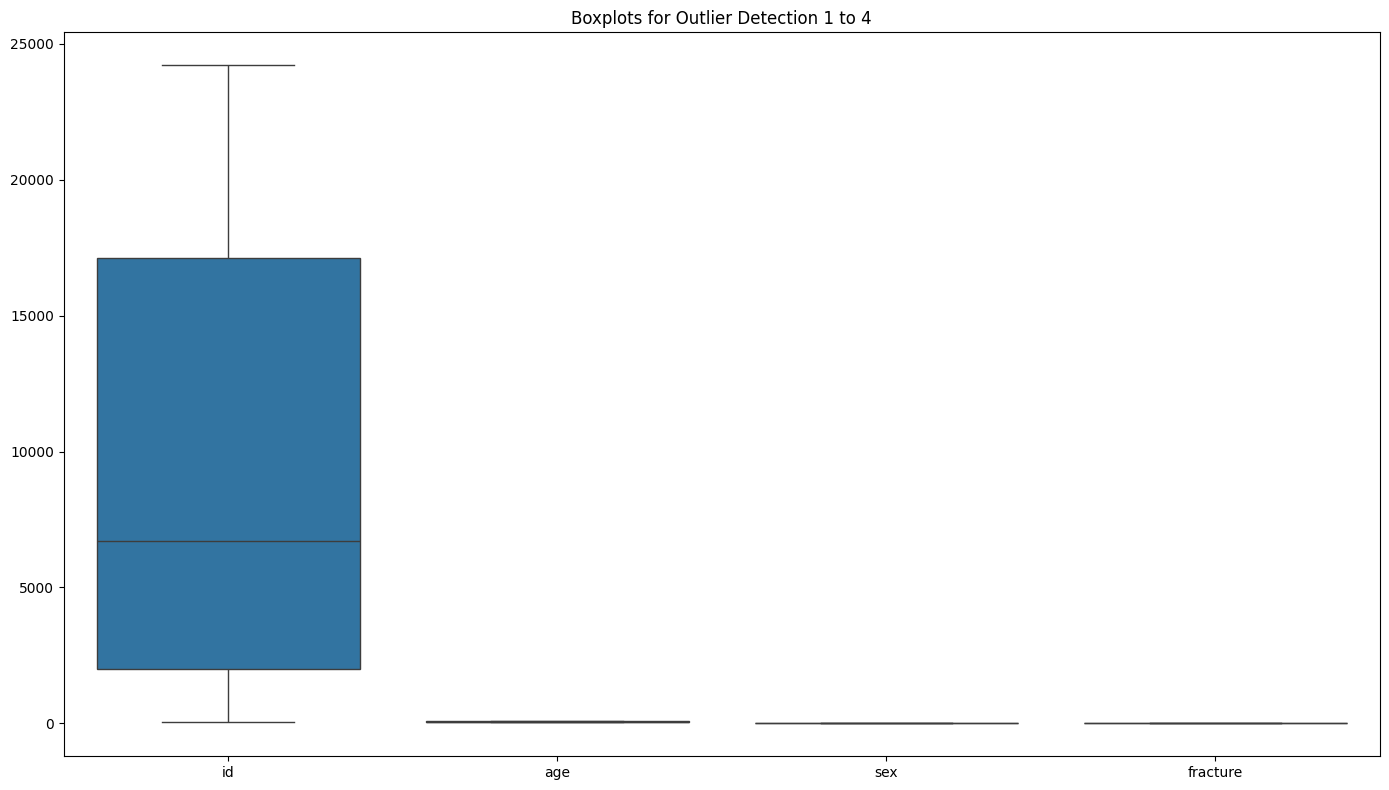

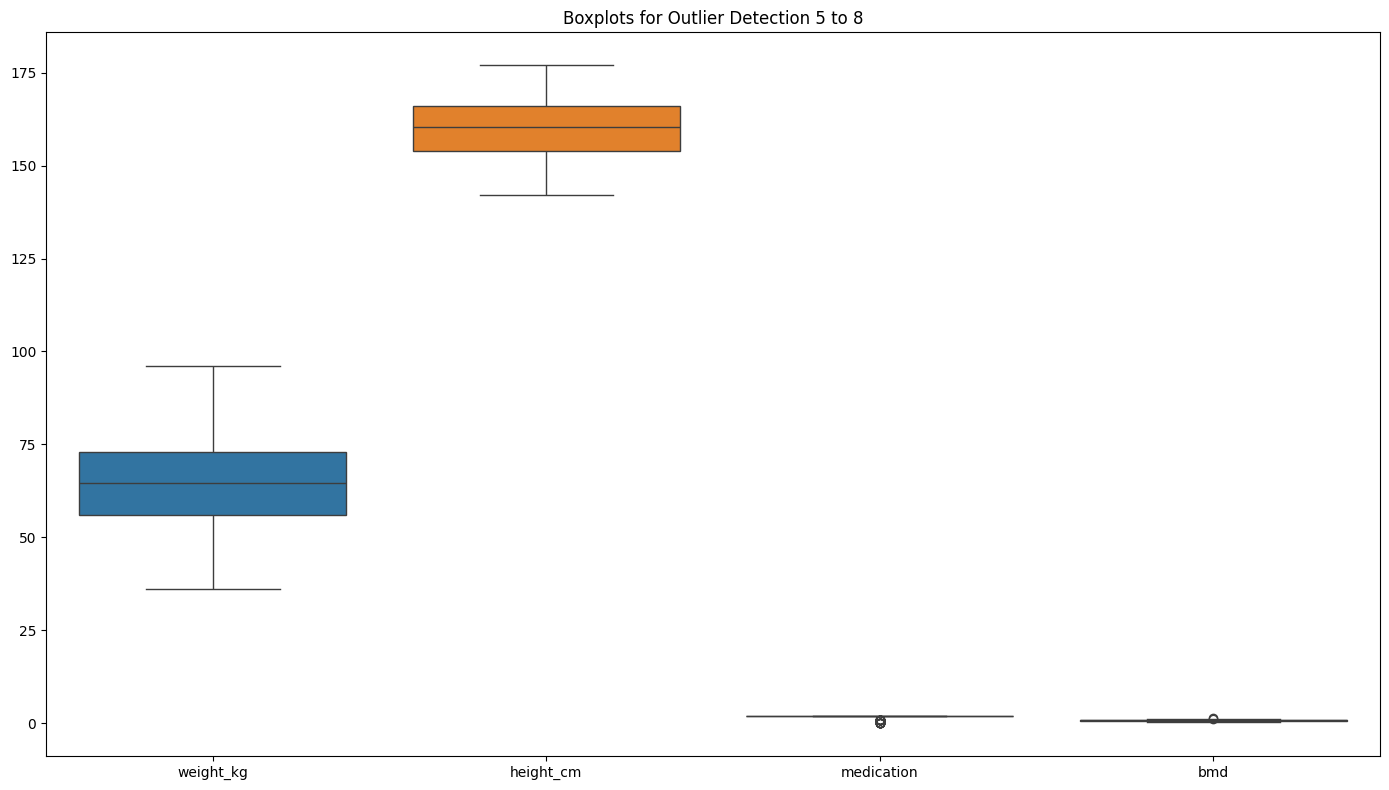

In [7]:
columns = data.columns
n_columns = len(columns)
group_size = 4
n_plots =(n_columns +group_size -1)// group_size

for i in range(n_plots):
    start_col = i * group_size
    end_col = min((i+1) *group_size, n_columns)
    cols_to_plot = columns[start_col:end_col]

    plt.figure(figsize=(14, 8))

    sns.boxplot(data=data[cols_to_plot])

    plt.title(f'Boxplots for Outlier Detection {start_col +1} to {end_col}')
    plt.tight_layout()
    plt.show()

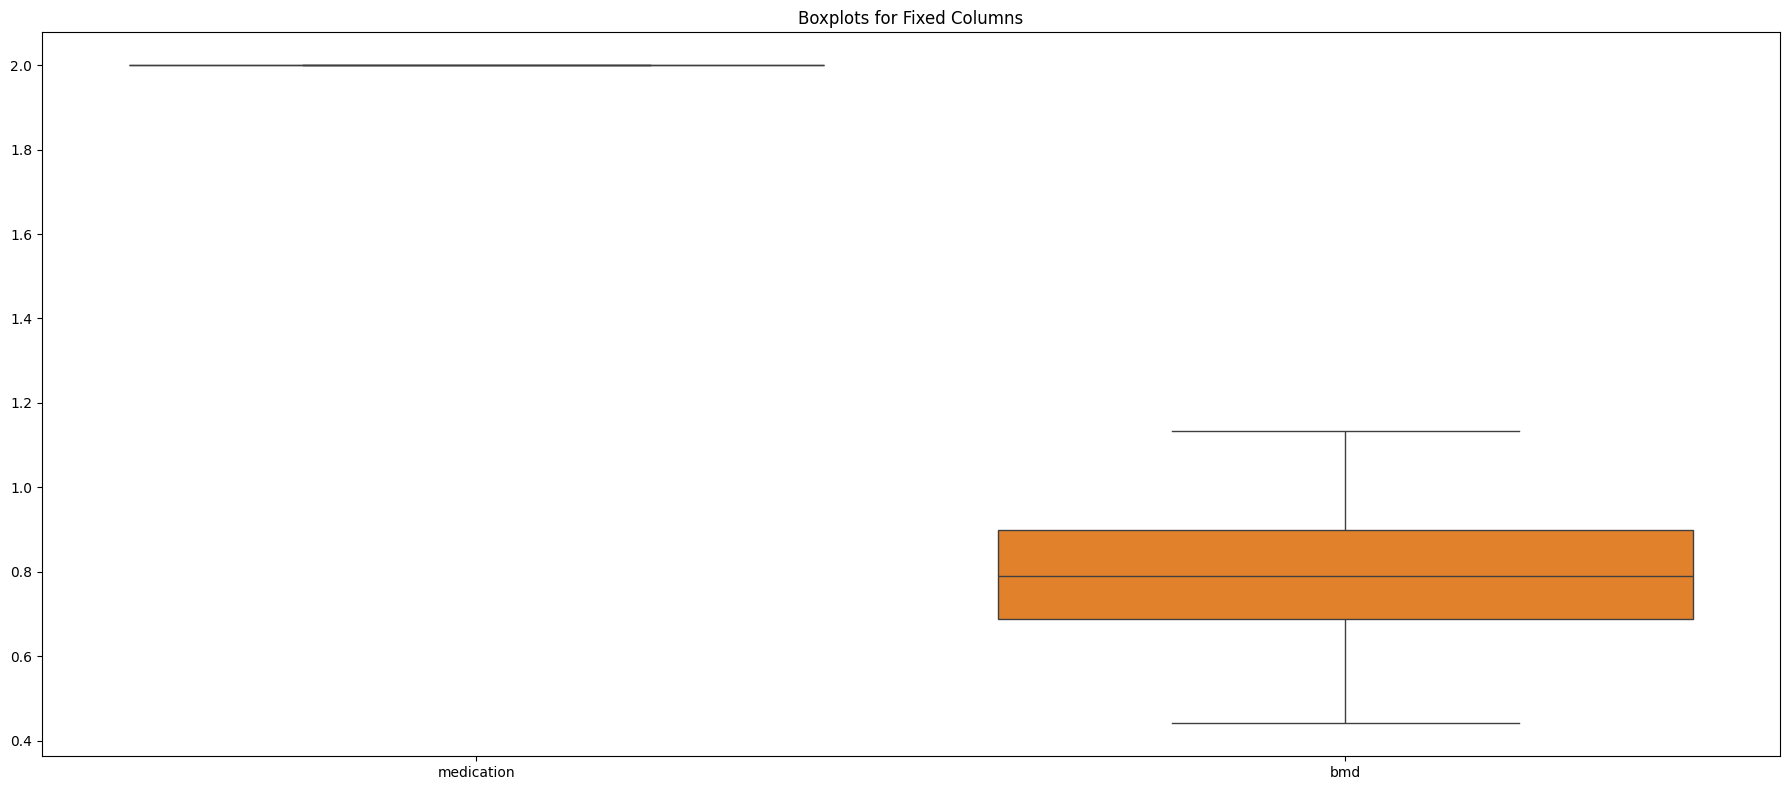

In [8]:
# handling outliers using IQR for columns:
# "medication", "bmd"

columns_to_plot = [ "medication", "bmd"]

for col in columns_to_plot:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

plt.figure(figsize=(18, 8))
sns.boxplot(data=data[columns_to_plot])
plt.title("Boxplots for Fixed Columns")
plt.tight_layout()
plt.show()


## 5. Normalization

**what we do here:**
- Scale data into a fixed range [0,1]
- Visualise how scaling affected the data

In [9]:
scalar = MinMaxScaler()
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = scalar.fit_transform(data[numerical_cols])
print("\nFirst 5 Rows of the Normalized dataset:")
data.head()


First 5 Rows of the Normalized dataset:


,id,age,sex,fracture,weight_kg,height_cm,medication,bmd
1,0.359451,0.764740,0.0,1.0,0.700000,0.571429,0.0,0.510826
2,0.277210,0.669695,1.0,1.0,0.616667,0.814286,0.0,0.672633
3,0.998842,0.812738,0.0,1.0,0.400000,0.171429,0.0,0.390445
4,0.704795,0.351997,1.0,1.0,0.316667,0.542857,0.0,0.505485
5,0.156000,0.792255,1.0,1.0,0.483333,0.742857,0.0,0.417725


## 6. Data Splitting

**what we do here:**
- Use the Hold out Method to split data in an 80-20 split
- Dropping the Target column "bmd" which indicates the bone mineral density of the patient

In [10]:
x= data.drop("bmd", axis=1)
y= data["bmd"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE)
print(f"\nX_train shape: {X_train.shape}")
print(f"\nX_test shape: {X_test.shape}")


X_train shape: (108, 7)

X_test shape: (27, 7)


Train Mean Squared Error: 0.0215
Train R^2 Score: 0.5607
Test Mean Squared Error: 0.0132
Test R^2 Score: 0.7239


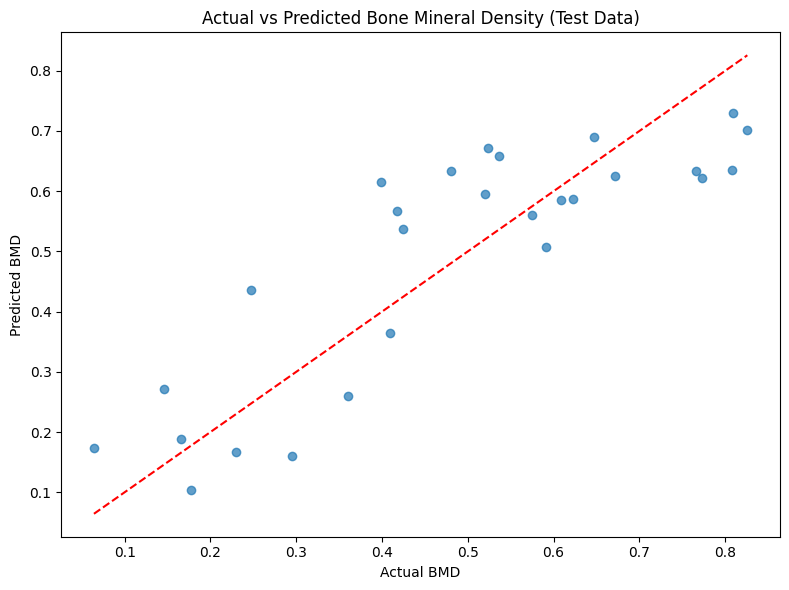

Model generalizes well (R^2 in reasonable range)


In [14]:
# 7. Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

# Initialize and train the model 
lr = LinearRegression()
lr.fit(X_train, y_train) 

# Predict on train and test data
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test) 

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f"Train Mean Squared Error: {mse_train:.4f}") 
print(f"Train R^2 Score: {r2_train:.4f}") 
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred) 
print(f"Test Mean Squared Error: {mse_test:.4f}") 
print(f"Test R^2 Score: {r2_test:.4f}") 

#Plot actual vs predicted (test only)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual BMD")
plt.ylabel("Predicted BMD")
plt.title("Actual vs Predicted Bone Mineral Density (Test Data)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show() 

# Simple overfitting/underfitting check
if r2_test < 0.5:
    print("Model is likely underfitting (low R^2 on test set)")
elif r2_test > 0.95:
    print("Model may be overfitting (very high R^2 on test set, check train/test gap)")
else:
    print("Model generalizes well (R^2 in reasonable range)")